In [1]:
import sys 
sys.path.append('../../')

In [2]:
import pandas as pd


def load_dataset(datasetname):
    df = pd.read_csv(datasetname)
    df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
    return df

In [3]:
from sklearn.discriminant_analysis import StandardScaler


plain_df = load_dataset('./exports/plain.csv')
plain_df = pd.DataFrame(StandardScaler().fit_transform(plain_df), columns=['0', '1', '2'])
plain_df.head()

,0,1,2
0,0.963966,0.130175,-0.618801
1,-0.975110,1.061153,1.734037
2,1.654614,-0.005777,-0.593620
3,0.454206,-1.486304,-0.345680
4,0.734987,-0.149866,-0.319982


## KMeans

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3e648ee0>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff3e648ee0>
Traceback 

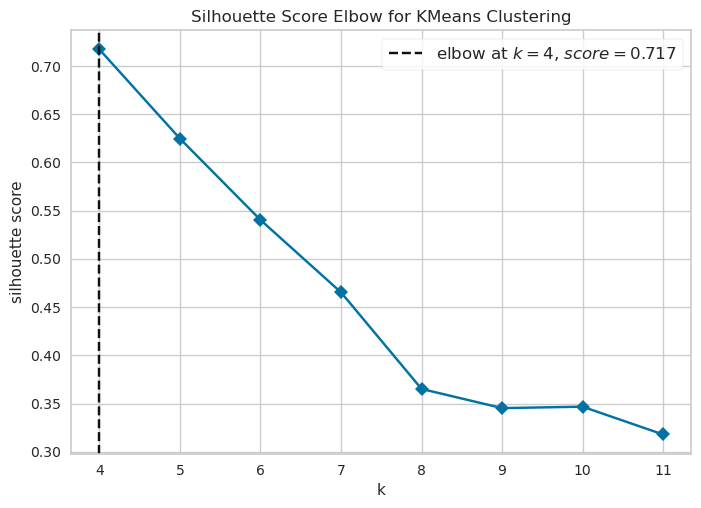

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [4]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12), metric='silhouette', timings=False)
visualizer.fit(plain_df)      # Fit the data to the visualizer
visualizer.show()

In [5]:
n_clusters = 4
model = KMeans(n_clusters=n_clusters, init='random', algorithm='lloyd')
model.fit(plain_df)

Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff80453310>
Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/opt/conda/lib/python3.9/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'
Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0xffff80453310>
Traceback 

KMeans(init='random', n_clusters=4)

## DBSCAN

Considering two parameters:
- Minimum points ($minPts): Is considered as n * 2, which means we set it to 6 (as n is the amount of features).
- Epsilon (radius): Is choosen based on a k-distance plot, that is created using 

In [6]:
from sklearn.neighbors import NearestNeighbors


neigh = NearestNeighbors(n_neighbors=2)
neighbours = neigh.fit(plain_df)
distances, indices = neighbours.kneighbors(plain_df)

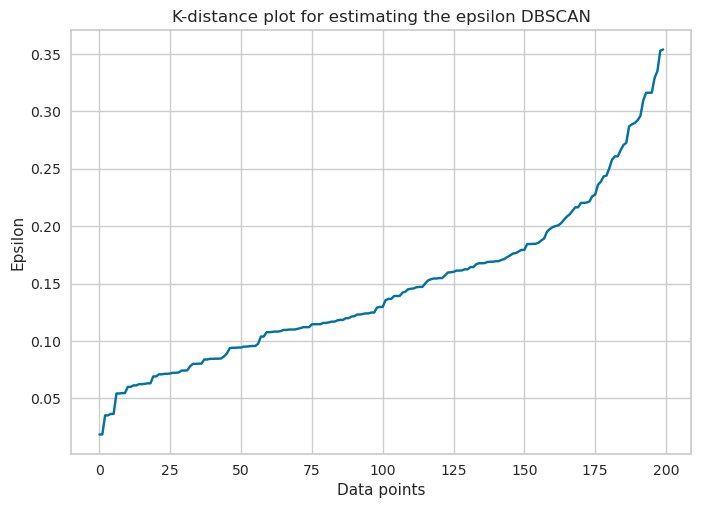

In [7]:
from matplotlib import pyplot as plt
import numpy as np


distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.title('K-distance plot for estimating the epsilon DBSCAN')
plt.xlabel('Data points')
plt.ylabel('Epsilon')
plt.plot(distances)

In [8]:
from sklearn.cluster import DBSCAN


epsilon = 0.6
m = DBSCAN(eps=epsilon, min_samples=6, metric='euclidean')
m.fit(plain_df)

DBSCAN(eps=0.6, min_samples=6)

/tmp/ipykernel_10246/1521949293.py:4: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


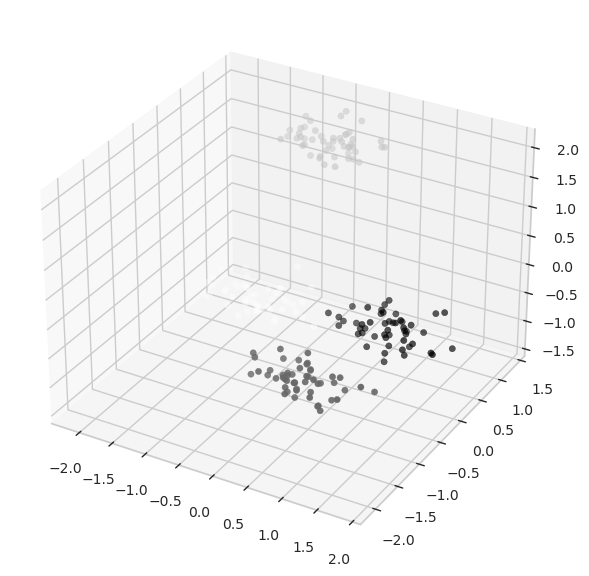

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(plain_df.iloc[:,0], plain_df.iloc[:,1], plain_df.iloc[:,2], c=model.labels_)

plt.show()


## Affinity Propagation

In [10]:
from sklearn.cluster import AffinityPropagation


ap = AffinityPropagation(damping=0.5, affinity='euclidean')
ap.fit(plain_df)

AffinityPropagation()

/tmp/ipykernel_10246/2409155615.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


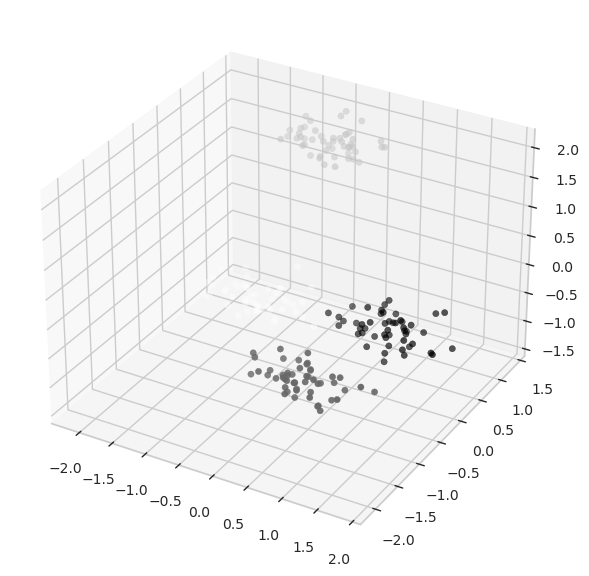

In [11]:
clusters = ap.labels_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(plain_df.iloc[:,0], plain_df.iloc[:,1], plain_df.iloc[:,2], c=model.labels_)
